## Proyecto Final

### Índice de Marginación de México

### Instrucciones

El Consejo Nacional de Población (CONAPO) del gobierno mexicano, realiza cada 5 años un análisis sobre un estudio multidimensional de la pobreza y establece un índice de marginación.

En https://www.gob.mx/cms/uploads/attachment/file/685354/Nota_te_cnica_IMEyM_2020.pdf se puede consultar el documento de como se calculó el índice para la encuesta del 2020. El índice, por municipio, se puede consultar en :

https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372

Junto con los indicadores más importantes para la medición multidimensional de la pobreza.

Para este proyecto te pedimos lo siguiente:

- Un repositorio en github para el proyecto. El repositorio deberá llevar un archivo readme.md en el que se explique lo que se hace y los archivos de código, pero no la base de datos. El archivo puede ser un ipynb, o un script .py, como lo prefieras.
- En el archivo py se espera se realice lo siguiente:
- Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020".
- Mostrar la descripción del DataFrame (medias, máximos mínimos, etc...)
- Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png
- Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg. ¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.
- Grafica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.
- ¿Existe una relación? ¿Cómo podrías analizar con que variable tiene mas corelación el porcentaje de analfabetismo en personas mayores de 15 años?
- Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.

### Importación de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importación y Ajuste de la Base de Datos

In [2]:
url = 'http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls'
data = pd.read_excel(url, header=None)
df = data.copy()
df.loc[5, 17] = 'RANK'
df.columns = df.iloc[5].tolist()
df = df.drop([0,1,2,3,4,5,6,7,2477,2478]).reset_index(drop=True)

for col in df.columns:
    first_value = df[col][0]
    if isinstance(first_value, int):
        df[col] = df[col].astype(int)
    elif isinstance(first_value, float):
        df[col] = df[col].astype(float)

#print(df.dtypes)

### Descripción del DataFrame

In [15]:
var_valor_perdido = df.columns[df.isnull().any()].to_list()
print('Columnas con valores nulos: ', len(var_valor_perdido))
print()
Num_de_var = df.shape[1] 
print('Columnas del dataframe: ' ,Num_de_var-1)

Columnas con valores nulos:  0

Columnas del dataframe:  17


### Resumen Estadístico: Estadígrafos Básicos.

- count: Número de valores no nulos.
- nunique: Número de valores únicos.
- min: Valor mínimo.
- max: Valor máximo.
- mean: Media.
- median: Mediana.
- std: Desviación estándar.
- var: Varianza.
- skew: Sesgo de la distribución.
- kurt: Curtosis de la distribución.
- sem: Error estándar de la media.
- quantile: Cuantiles de la distribución.

In [4]:
#df.describe()
df.iloc[:].agg(['count','nunique','min','max','mean','median','std','var','skew','sem','kurt'
,'quantile'])

C:\Users\HP\AppData\Local\Temp\ipykernel_17832\1796818203.py:2: FutureWarning: ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'GM_2020'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.iloc[:].agg(['count','nunique','min','max','mean','median','std','var','skew','sem','kurt'


,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,RANK
count,2469,2469,2469,2469,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469,2469.000000,2469.000000
nunique,32,32,2469,2328,2.402000e+03,2462.000000,2466.000000,2431.000000,2435.000000,2417.000000,2458.000000,2448.000000,1186.000000,2447.000000,2469.000000,5,2469.000000,2469.000000
min,01,Aguascalientes,01001,Abalá,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,Alto,0.335198,1.000000
max,32,Zacatecas,32058,Ónavas,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,Muy bajo,0.977052,2469.000000
mean,inf,NaN,inf,NaN,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,NaN,0.844869,1235.000000
median,20.0,NaN,20226.0,NaN,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,NaN,0.852196,1235.000000
std,NaN,NaN,NaN,NaN,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,NaN,0.061140,712.883230
var,NaN,NaN,NaN,NaN,2.160627e+10,58.272347,195.484962,27.976682,7.668286,85.488416,80.525333,112.074820,1243.812474,139.959394,15.245821,NaN,0.003738,508202.500000
skew,-0.080787,NaN,-0.103535,NaN,6.894960e+00,1.405318,-0.033677,4.833064,8.505714,3.114876,2.107033,0.735904,-0.648565,-0.917962,-1.304283,NaN,-1.304283,0.000000
sem,NaN,NaN,NaN,NaN,2.958213e+03,0.153628,0.281382,0.106448,0.055730,0.186077,0.180595,0.213056,0.709769,0.238090,0.078581,NaN,0.001230,14.346893


### Porcentaje de Indice de Marginacion de Municipio por Estado

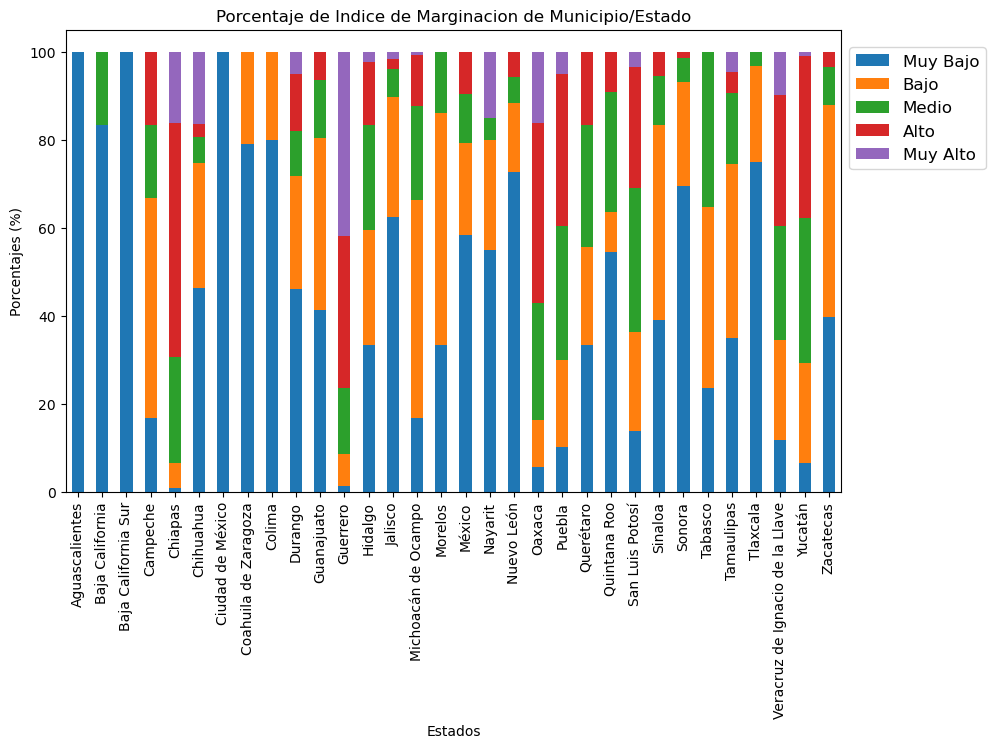

In [38]:
munic_estado_indice = df.groupby(['NOM_ENT', 'GM_2020']).size().unstack(fill_value=0)
porcent = munic_estado_indice.div(munic_estado_indice.sum(axis=1), axis=0)[['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']] *100

porcent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Porcentaje de Indice de Marginacion de Municipio/Estado')
plt.xlabel('Estados')
plt.ylabel('Porcentajes (%)')
plt.legend(['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'], bbox_to_anchor=(1, 0.98), fontsize=12)
plt.savefig('porcentaje_municipio_estado_indice.png', bbox_inches='tight')

### Porcentaje de Indice de Marginacion por Poblacion de Municipio/Estado

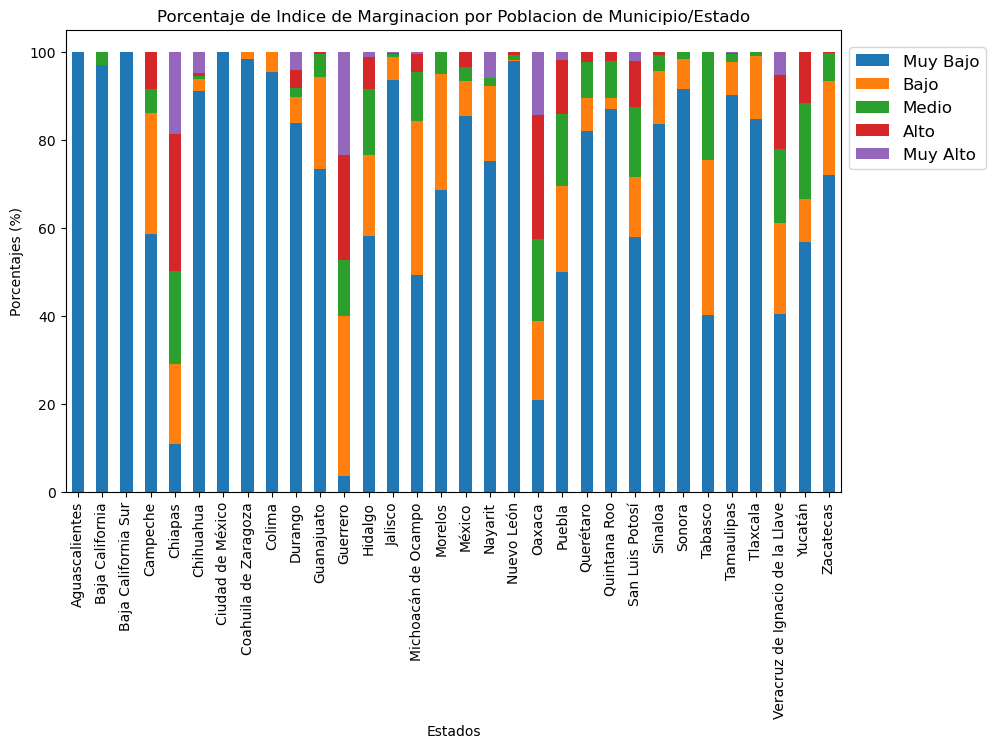

In [37]:
grouped = df.groupby(['NOM_ENT', 'GM_2020'])['POB_TOT'].sum()
unstacked = grouped.unstack(fill_value=0)
ppp = (unstacked / unstacked.sum(axis=1).values.reshape(-1, 1))[['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']]  * 100

ppp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Porcentaje de Indice de Marginacion por Poblacion de Municipio/Estado')
plt.xlabel('Estados')
plt.ylabel('Porcentajes (%)')
plt.legend(['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'], bbox_to_anchor=(1, 0.98), fontsize=12)
plt.savefig('porcentaje_poblacion_municipio_estado_indice.jpg', bbox_inches='tight')

### Relación de Analfabetismo (%) respecto a Poblaciones en localidades de menos de 5,000 habitantes (%).

Coeficiente de correlación de Pearson es:  0.4493243935223989 , lo que representa un relacion positiva y moderada entre las dos variables.


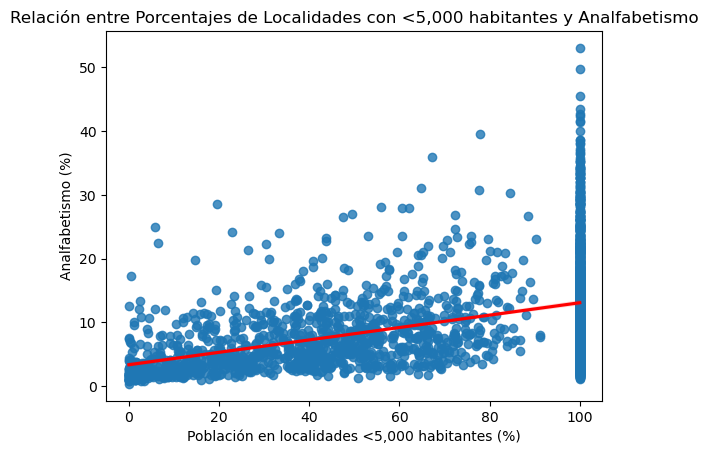

In [7]:
corr = df['PL.5000'].astype(float).corr(df['ANALF'].astype(float))

sns.regplot(x=df['PL.5000'], y=df['ANALF'],line_kws={'color': 'red'})
plt.xlabel('Población en localidades <5,000 habitantes (%)')
plt.ylabel('Analfabetismo (%)')
plt.title('Relación entre Porcentajes de Localidades con <5,000 habitantes y Analfabetismo')

print('Coeficiente de correlación de Pearson es: ', corr, ', lo que representa un relacion positiva y moderada entre las dos variables.')

### Matriz de Correlacion y Maxima Correlacion con Analfabetismo

In [16]:
corr_matrix = df.corr(numeric_only=True)
corr_analf = corr_matrix.loc['ANALF']
max_corr_variable = corr_analf.drop('ANALF').idxmax()
max_corr = corr_analf.drop('ANALF').max()
#print(corr_analf.head(len(corr_analf)))
print()
print('La máxima correlación de Analfabetismo es de:', max_corr, 'con la variable', max_corr_variable, ', Población  de 15 años o más sin educación básica')


La máxima correlación de Analfabetismo es de: 0.7790527533171022 con la variable SBASC , Población  de 15 años o más sin educación básica


### DataFrame con Indicadores Nuevos por cada Estado 

Indicadores Propuestos:

- Índice de marginación Educativa **[IM_EDU]**: Suma ponderada de los porcentajes de población de mayor de 15 años analfabeta y de población mayor de 15 años sin educación básica.

- Índice de marginación de Vivienda **[IM_VIV]**: Suma ponderada de los porcentajes de ocupantes en viviendas particulares sin drenaje ni excusado, sin energía eléctrica, sin agua entubada y con piso de tierra, así como el porcentaje de viviendas con hacinamiento.

- Índice de marginación Demográfica **[IM_DE]**: Porcentaje de población en localidades con menos de 5 000 habitantes.

- Índice de marginación Socioeconómico-Demografico **[IM_SOEDUDE]**: este índice podría calcularse como la suma ponderada de los índices de marginación educativa y de vivienda.

In [9]:
IM_EDU = 'IM_EDU'
IM_VIV = 'IM_VIV'
IM_DE = 'IM_DE'

IM_EDU_NORM = 'IM_EDU_NORM'
IM_VIV_NORM = 'IM_VIV_NORM'
IM_DE_NORM = 'IM_DE_NOM'

IM_SOEDUDE = 'IM_SOEDUDE'
IM_SOEDUDE_NORM = 'IM_SOEDUDE_NORM'

In [11]:
df_estado = df.groupby(['CVE_ENT', 'NOM_ENT']).agg({
    'POB_TOT': ['sum'],
    'ANALF': ['mean'],
    'SBASC': ['mean'],
    'OVSDE': ['mean'],
    'OVSEE': ['mean'],
    'OVSAE': ['mean'],
    'OVPT': ['mean'],
    'VHAC': ['mean'],
    'PL.5000': ['mean']
})

df_estado[IM_EDU] = df_estado[('ANALF', 'mean')] + df_estado[('SBASC', 'mean')]
df_estado[IM_EDU_NORM] = (df_estado[IM_EDU] - df_estado[IM_EDU].min()) / (df_estado[IM_EDU].max() - df_estado[IM_EDU].min())

df_estado[IM_VIV] = df_estado[('OVSDE', 'mean')] + df_estado[('OVSEE', 'mean')] + df_estado[('OVSAE', 'mean')] + df_estado[('OVPT', 'mean')] + df_estado[('VHAC', 'mean')]
df_estado[IM_VIV_NORM] = (df_estado[IM_VIV] - df_estado[IM_VIV].min()) / (df_estado[IM_VIV].max() - df_estado[IM_VIV].min())

df_estado[IM_DE] = df_estado[('PL.5000', 'mean')]
df_estado[IM_DE_NORM] = (df_estado[IM_DE] - df_estado[IM_DE].min()) / (df_estado[IM_DE].max() - df_estado[IM_DE].min())

df_estado[IM_SOEDUDE] = df_estado['IM_EDU'] + df_estado['IM_VIV'] + df_estado['IM_DE']
df_estado[IM_SOEDUDE_NORM] = (df_estado[IM_SOEDUDE] - df_estado[IM_SOEDUDE].min()) / (df_estado[IM_SOEDUDE].max() - df_estado[IM_SOEDUDE].min())

#df_estado.head()

df_estado.to_parquet('Nuevos Índices de Marginación por Estado.parquet')

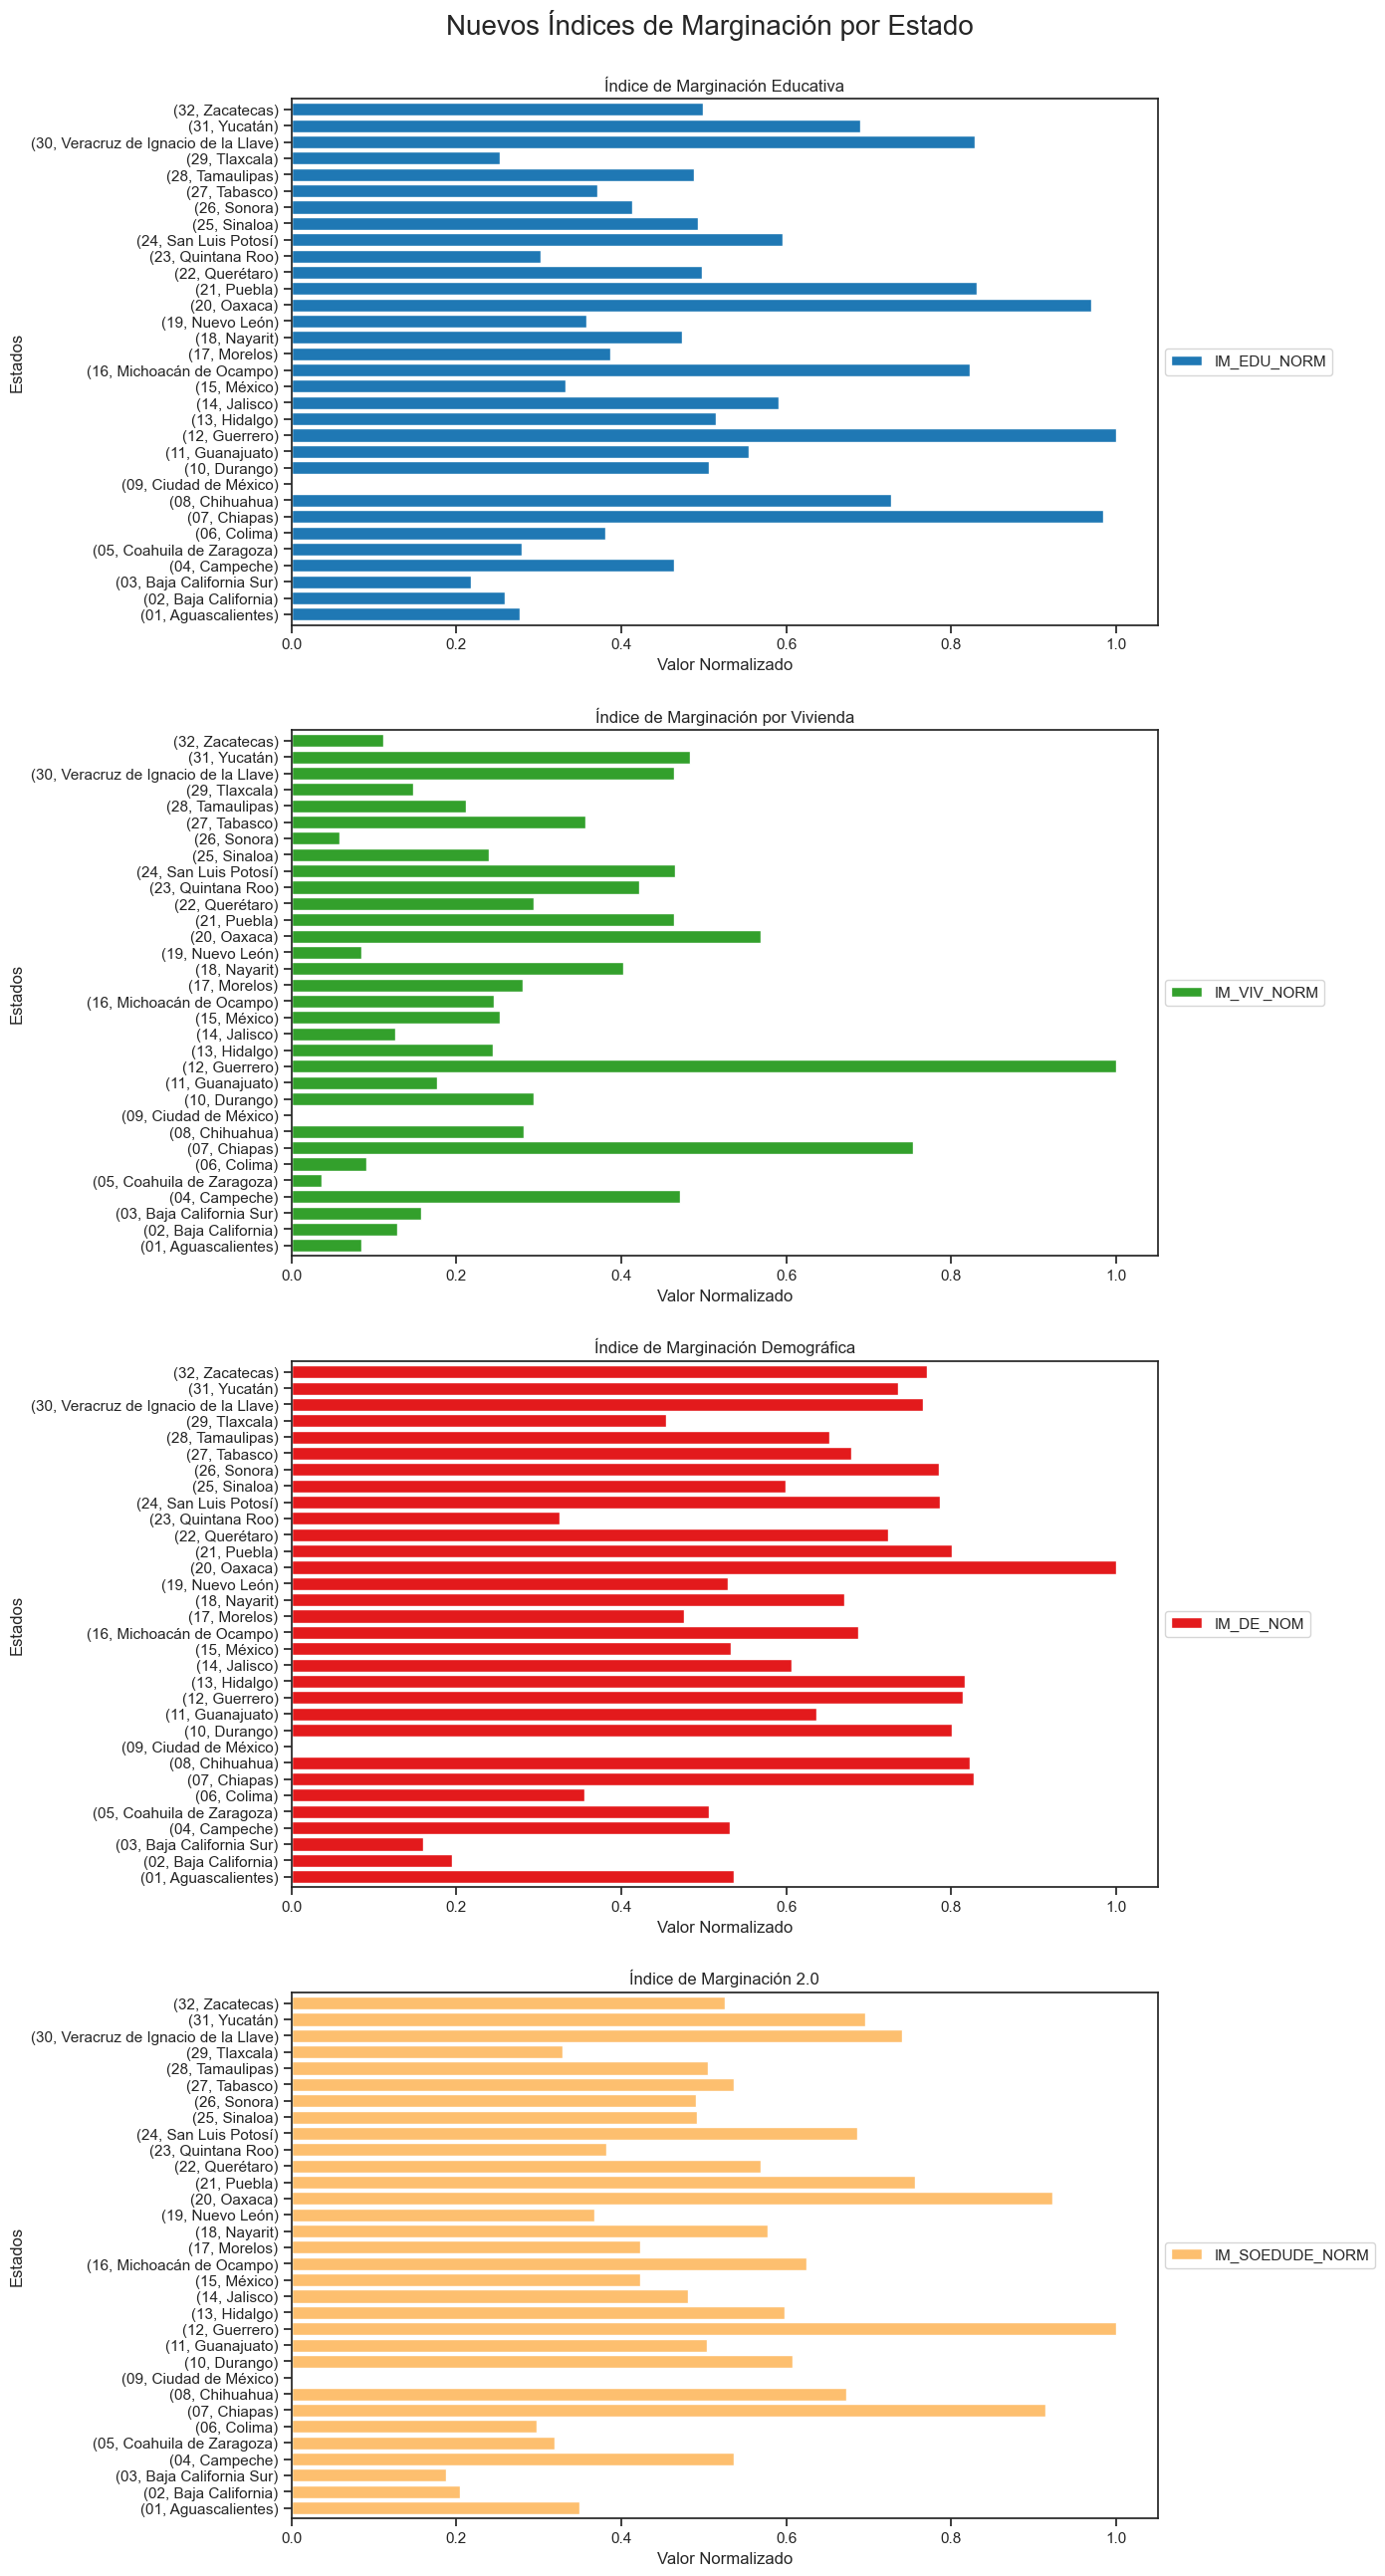

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,30))
colors = sns.color_palette("Paired")

df_estado.plot.barh(y='IM_EDU_NORM', width=0.8, ax=axs[0], color = colors[1])
axs[0].set_xlabel('Valor Normalizado')
axs[0].set_ylabel('Estados')
axs[0].set_title('Índice de Marginación Educativa')
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

df_estado.plot.barh(y='IM_VIV_NORM', width=0.8, ax=axs[1], color = colors[3])
axs[1].set_xlabel('Valor Normalizado')
axs[1].set_ylabel('Estados')
axs[1].set_title('Índice de Marginación por Vivienda')
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

df_estado.plot.barh(y='IM_DE_NOM', width=0.8, ax=axs[2], color = colors[5])
axs[2].set_xlabel('Valor Normalizado')
axs[2].set_ylabel('Estados')
axs[2].set_title('Índice de Marginación Demográfica')
axs[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

df_estado.plot.barh(y='IM_SOEDUDE_NORM', width=0.8, ax=axs[3], color = colors[6])
axs[3].set_xlabel('Valor Normalizado')
axs[3].set_ylabel('Estados')
axs[3].set_title('Índice de Marginación 2.0')
axs[3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.suptitle('Nuevos Índices de Marginación por Estado', fontsize=20, y=0.91)
plt.subplots_adjust(hspace=0.2)
plt.show()